# Boston Asian Food Reviews Sentiment Analysis

**Name:** Brayden Uglione

**Date:** 12/4/24

**Research Question:** How do sentiment analysis techniques differ in their interpretation of Asian restaurant reviews in Boston?

**Problem:** Traditional review reading can be very time-consuming, especially for cities as big as Boston.

**Solution:** Natural language processing solves this problem by calculating sentiment to determine good and bad reviews and analyzing large datasets relatively swiftly.

#### Import libraries

In [60]:
import requests
import json
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import yelpkeys

#### Set up Yelp Fusion API

Set up API key and endpoint

In [61]:
API_KEY = yelpkeys.api_key
ENDPOINT = 'https://api.yelp.com/v3/businesses/search'
HEADERS = {'Authorization': f'Bearer {API_KEY}'}

Define search parameters

In [62]:
# ChatGPT, response to "Write a Python script to interact with the Yelp Fusion API to search for businesses in a specific location and retrieve their reviews.", OpenAI, December 1, 2024
params = {
    'term': 'Asian food',
    'location': 'Boston',
    'limit': 20
}

Send Request to Yelp API

In [63]:
# ChatGPT, response to "Write a Python script to interact with the Yelp Fusion API to search for businesses in a specific location and retrieve their reviews.", OpenAI, December 1, 2024
response = requests.get(ENDPOINT, headers=HEADERS, params=params)

Extract businesses

In [64]:
# ChatGPT, response to "Write a Python script to interact with the Yelp Fusion API to search for businesses in a specific location and retrieve their reviews.", OpenAI, December 1, 2024
businesses = json.loads(response.text)['businesses']

#### Collect reviews for each business

In [65]:
# ChatGPT, response to "Write a Python script to interact with the Yelp Fusion API to search for businesses in a specific location and retrieve their reviews.", OpenAI, December 1, 2024
reviews = []
for business in businesses:
    business_id = business['id']
    review_endpoint = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'
    review_response = requests.get(review_endpoint, headers=HEADERS)
    business_reviews = json.loads(review_response.text)['reviews']
    reviews.extend([review['text'] for review in business_reviews])

#### Clean reviews

In [66]:
# ChatGPT, response to "How to get rid of stop words from a list of strings", OpenAI, December 1, 2024
stop_words = set(stopwords.words('english'))
cleaned_reviews = [' '.join([word.lower() for word in review.split() if word.lower() not in stop_words]) for review in reviews]

#### Perform sentiment analysis

Textblob Analyzer

In [67]:
# ChatGPT, response to "How to use Textblob Analyzer with a list of strings", OpenAI, December 1, 2024
sentiments_textblob = [TextBlob(review).sentiment.polarity for review in cleaned_reviews]

NaiveBayesAnalyzer

In [68]:
# ChatGPT, response to "How to use NaiveBayesAnalyzer with a list of strings", OpenAI, December 1, 2024
sentiments_naive_bayes = [TextBlob(review, analyzer=NaiveBayesAnalyzer()).sentiment.classification for review in cleaned_reviews]

#### Identify & count positive, negative, and neutral reviews

Textblob Analyzer

In [69]:
# ChatGPT, response to "How to count the number of positive, negative, and neutral sentiments for Textblob Analyzer", OpenAI, December 1, 2024
positive_tb = sum(1 for s in sentiments_textblob if s > 0)
negative_tb = sum(1 for s in sentiments_textblob if s < 0)
neutral_tb = len(sentiments_textblob) - positive_tb - negative_tb

NaiveBayesAnalyzer

In [70]:
# ChatGPT, response to "How to count the number of positive and negative sentiments for NaiveBayesAnalyzer", OpenAI, December 1, 2024
positive_nb = sentiments_naive_bayes.count('pos')
negative_nb = sentiments_naive_bayes.count('neg')
neutral_nb = len(sentiments_naive_bayes) - positive_nb - negative_nb

#### Create donut charts

Textblob Analyzer

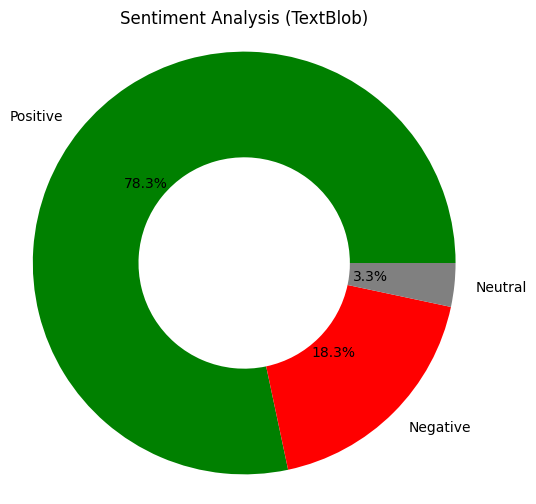

In [71]:
# ChatGPT, response to "How to make a donut chart using matplotlib?", OpenAI, December 1, 2024
plt.figure(figsize=(6, 6))
plt.pie([positive_tb, negative_tb, neutral_tb], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=['green', 'red', 'gray'], wedgeprops=dict(width=0.5))
plt.title('Sentiment Analysis (TextBlob)')
plt.axis('equal')
plt.show()

**The majority of reviews are positive, indicating that Bostonians are fond of the local asian food.**

NaiveBayesAnalyzer

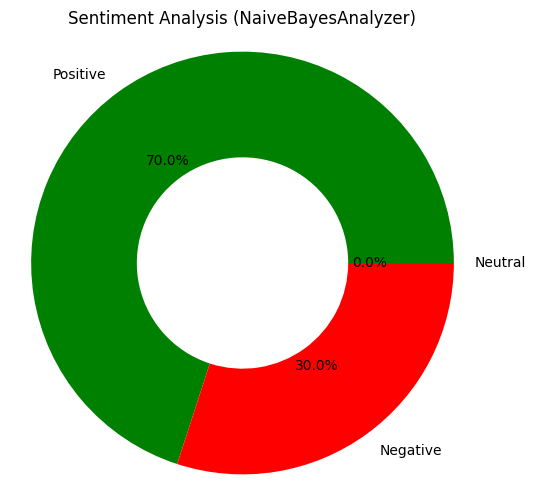

In [72]:
# ChatGPT, response to "How to make a donut chart using matplotlib?", OpenAI, December 1, 2024
plt.figure(figsize=(6, 6))
plt.pie([positive_nb, negative_nb, neutral_nb], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=['green', 'red', 'gray'], wedgeprops=dict(width=0.5))
plt.title('Sentiment Analysis (NaiveBayesAnalyzer)')
plt.axis('equal')
plt.show()

**Yet again, most Bostonians positively view the local asian food. However, NaiveBayesAnalyzer detected significantly more negative reviews than Textblob**

#### Create WordCloud

Create WordCloud

In [73]:
# ChatGPT, response to "How to make a WordCloud using matplotlib?", OpenAI, December 1, 2024
text = ' '.join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

Display WordCloud

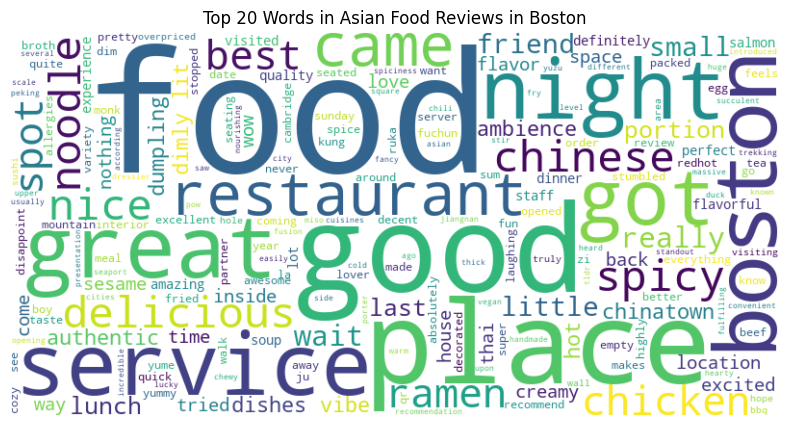

In [74]:
# ChatGPT, response to "How to make a WordCloud using matplotlib?", OpenAI, December 1, 2024
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words in Asian Food Reviews in Boston')
plt.show()

**The most common words are "food", "good", and "place", with "noodle", "ramen", and "chicken" being the most mentioned food items across reviews.**

### Conclusion

The sentiment analysis of Asian restaurant reviews in Boston, using TextBlob and NaiveBayesAnalyzer, reveals a positive perception of the cuisine, with TextBlob reporting 78.3% positive sentiment and NaiveBayesAnalyzer reporting 70% positive sentiment; this indicates that TextBlob generally views reviews more optimistically than NaiveBayesAnalyzer. Additionally, the terms in the WorldCloud display that noodles and ramen are the most prevalent asian foods in Boston.